In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency

In [162]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [163]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [164]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [165]:
df.shape


(7043, 21)

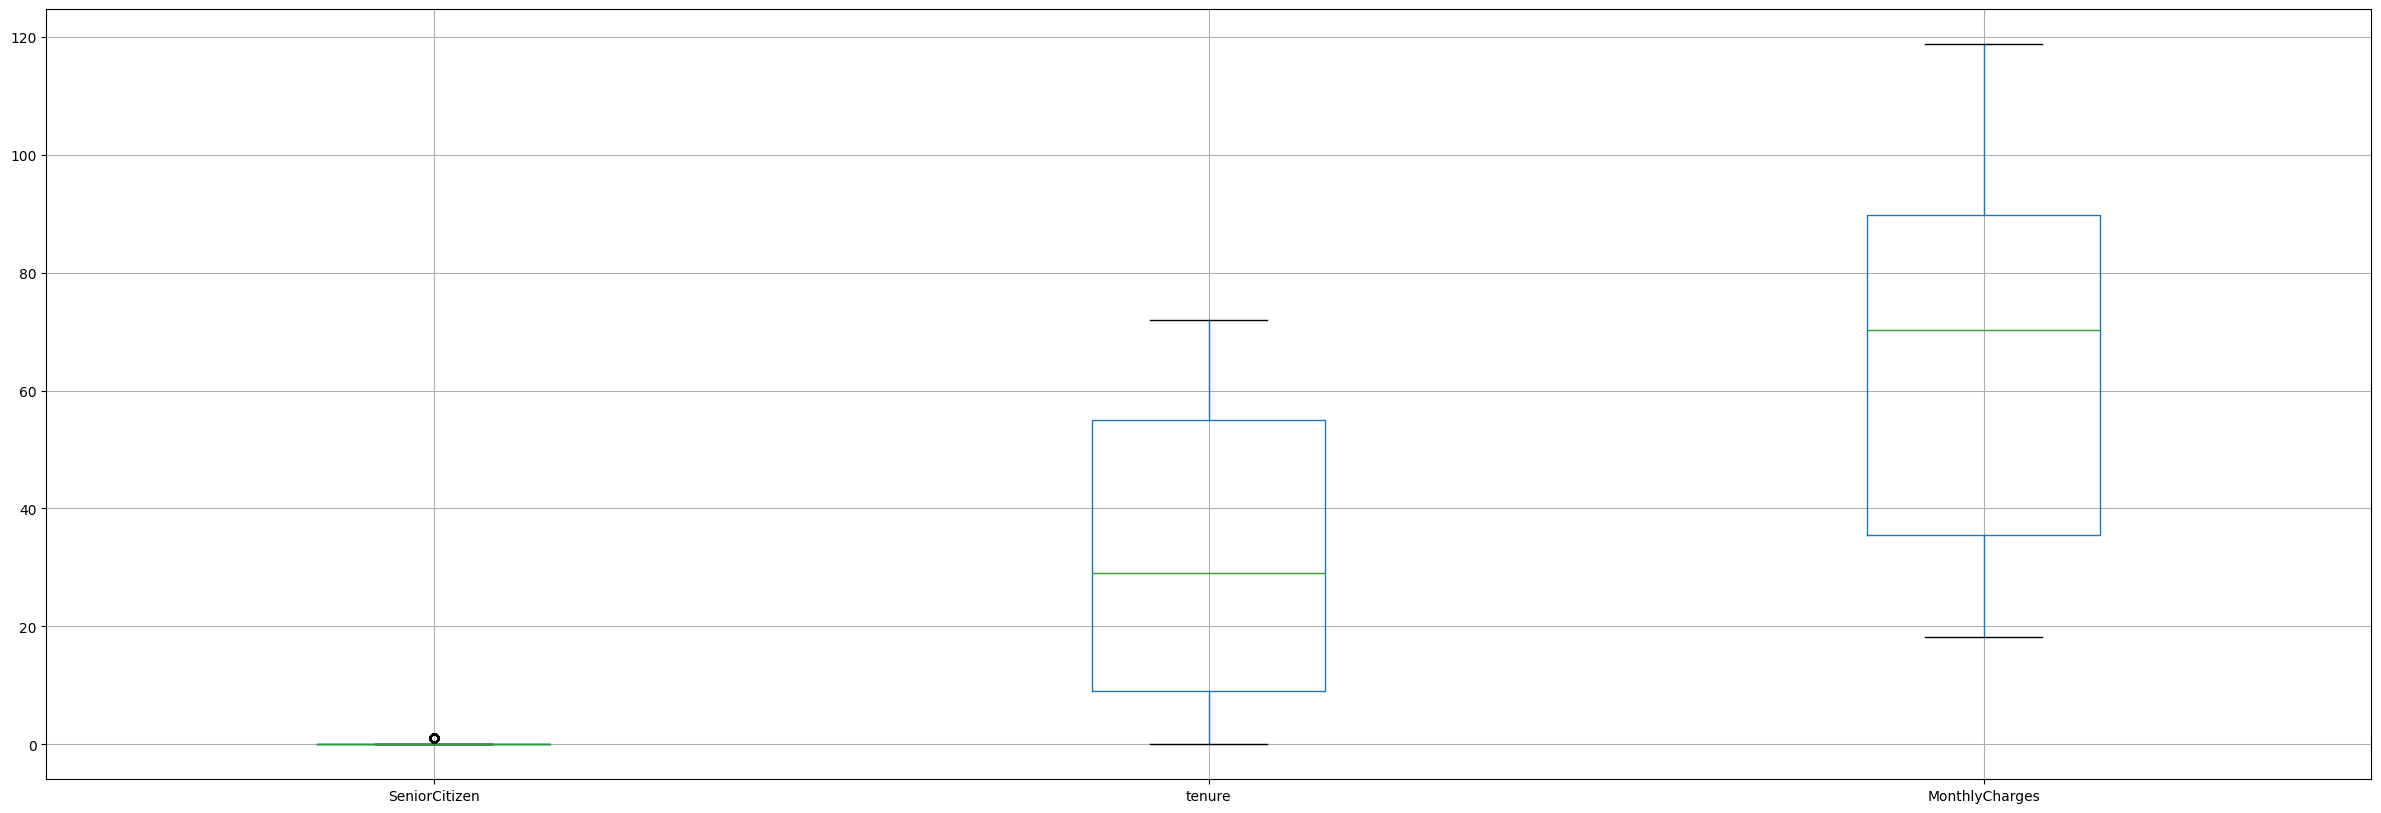

In [166]:
df.boxplot(figsize=(30, 10))
plt.show()

In [167]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

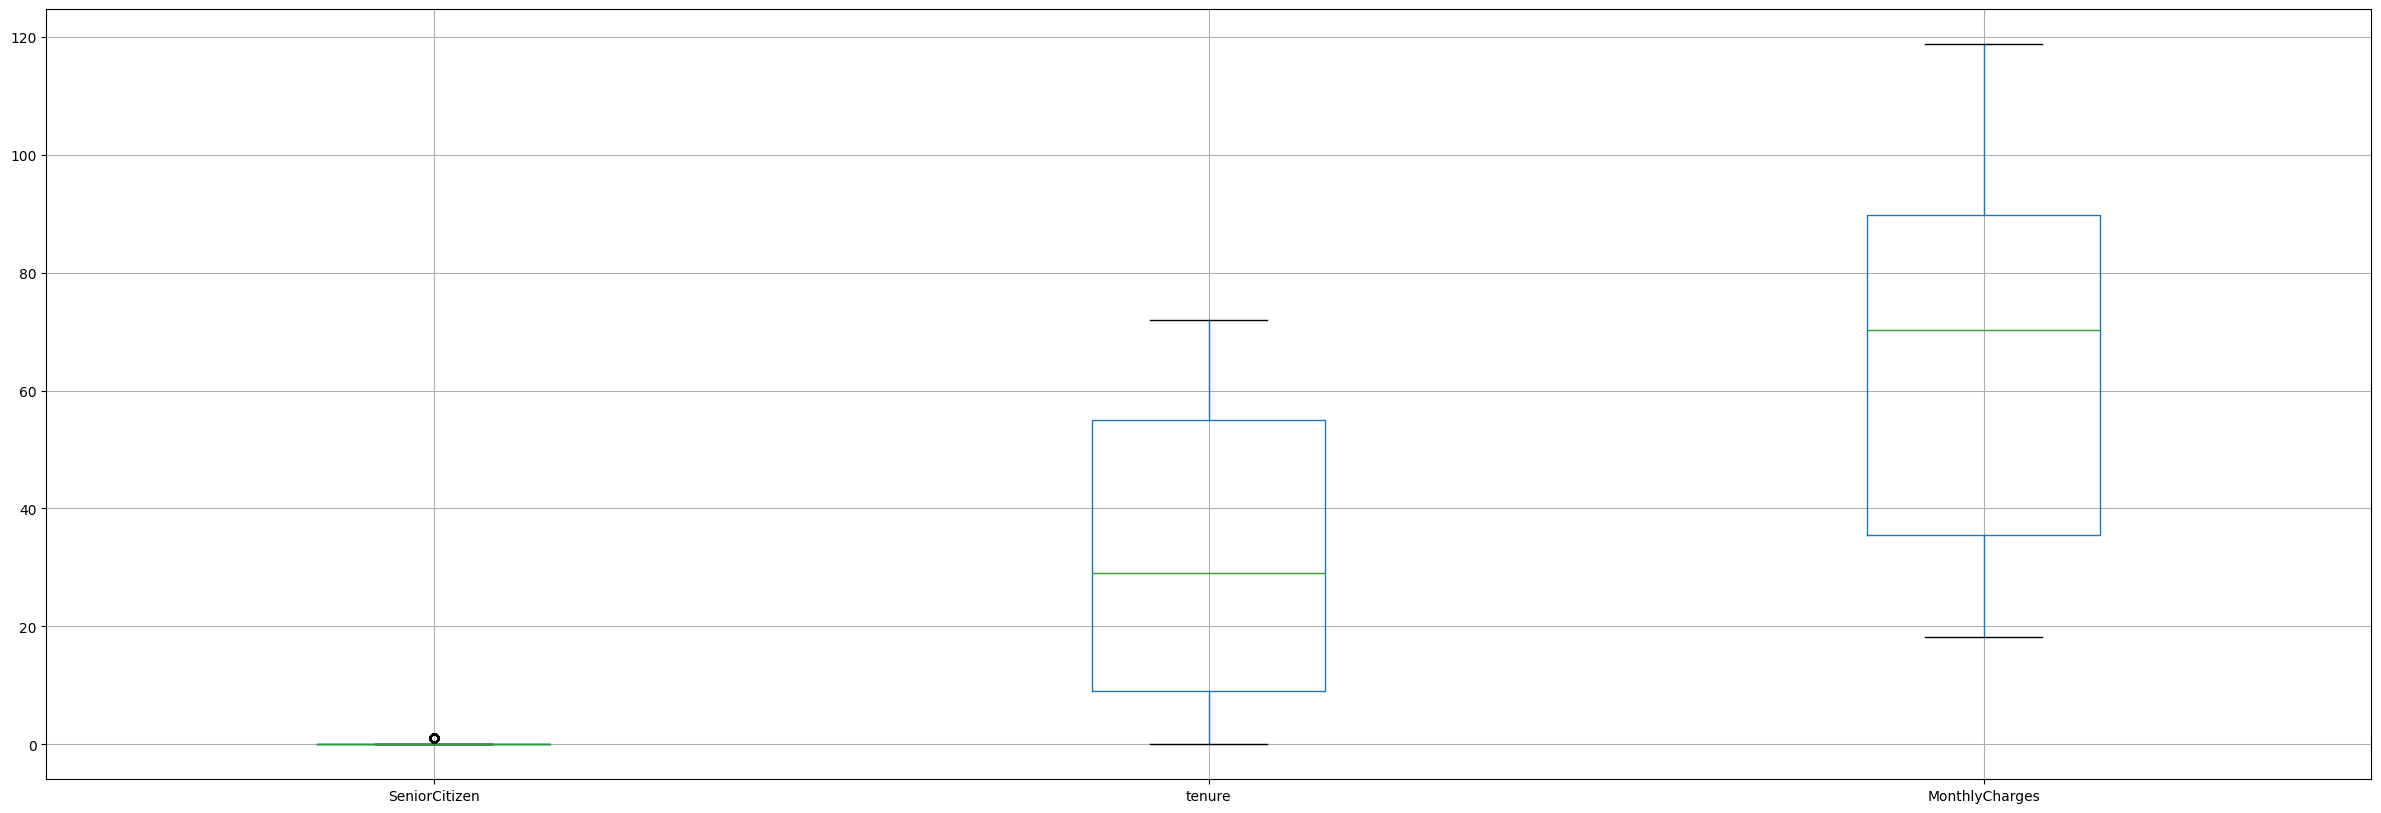

In [168]:
df.boxplot(figsize=(30, 10))
plt.show()

In [169]:
# Convert 'TotalCharges' to numeric (handling empty values)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(subset=["TotalCharges"], inplace=True)

In [170]:
# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])

In [171]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [172]:
# Encode categorical features
cat_cols = df.select_dtypes(include=['object']).columns.drop(["customerID"])  # Exclude ID
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [173]:
# Scaling numerical features
scaler = MinMaxScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [174]:
df["tenure"] = df["tenure"].replace(0, df["tenure"].mean())
df["tenure"] = df["tenure"].replace(1, df["tenure"].mean())


In [175]:
# Save cleaned dataset
df.to_csv("Ccuustomer_dataa_cccleeanedd.csv", index=False)
print("Cleaned dataset saved as 'customer_data_cleaned.csv'")

Cleaned dataset saved as 'customer_data_cleaned.csv'


C:\Users\NTC\AppData\Local\Temp\ipykernel_8492\298154872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Blues')


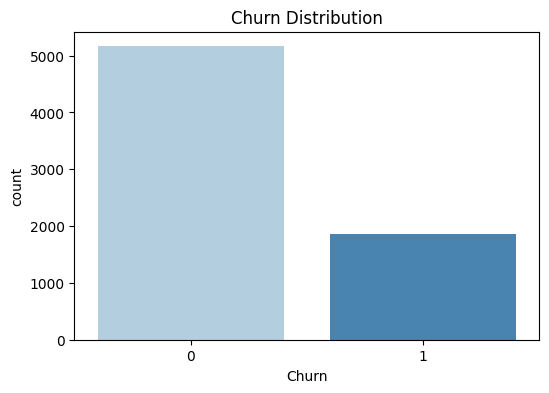

In [176]:
# EDA: Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Blues')
plt.title('Churn Distribution')
plt.show()


C:\Users\NTC\AppData\Local\Temp\ipykernel_8492\723051991.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Blues')


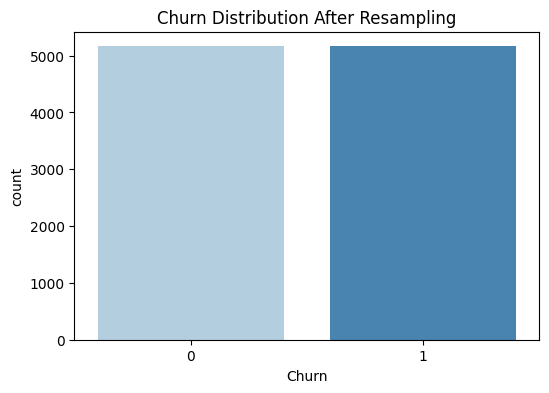

In [177]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette='Blues')
plt.title('Churn Distribution After Resampling')
plt.show()


In [178]:
# Categorical feature significance
categorical_features = df.select_dtypes(include=['int64']).columns.drop(['Churn'])
chi2_results = {col: chi2_contingency(pd.crosstab(df[col], df['Churn']))[1] for col in categorical_features}
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'p-value'])
print(chi2_df.sort_values('p-value'))

             Feature        p-value
13          Contract  7.326182e-257
7     OnlineSecurity  1.400687e-184
10       TechSupport  7.407808e-180
6    InternetService  5.831199e-159
15     PaymentMethod  1.426310e-139
8       OnlineBackup  7.776099e-131
9   DeviceProtection  1.959389e-121
12   StreamingMovies   5.353560e-82
11       StreamingTV   1.324641e-81
14  PaperlessBilling   8.236203e-58
3         Dependents   2.019659e-42
1      SeniorCitizen   2.479256e-36
2            Partner   3.973798e-36
5      MultipleLines   3.567927e-03
4       PhoneService   3.499240e-01
0             gender   4.904885e-01


In [179]:
# Split dataset into training and testing sets
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [180]:
# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy Score: 0.7889125799573561
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[930 103]
 [194 180]]
